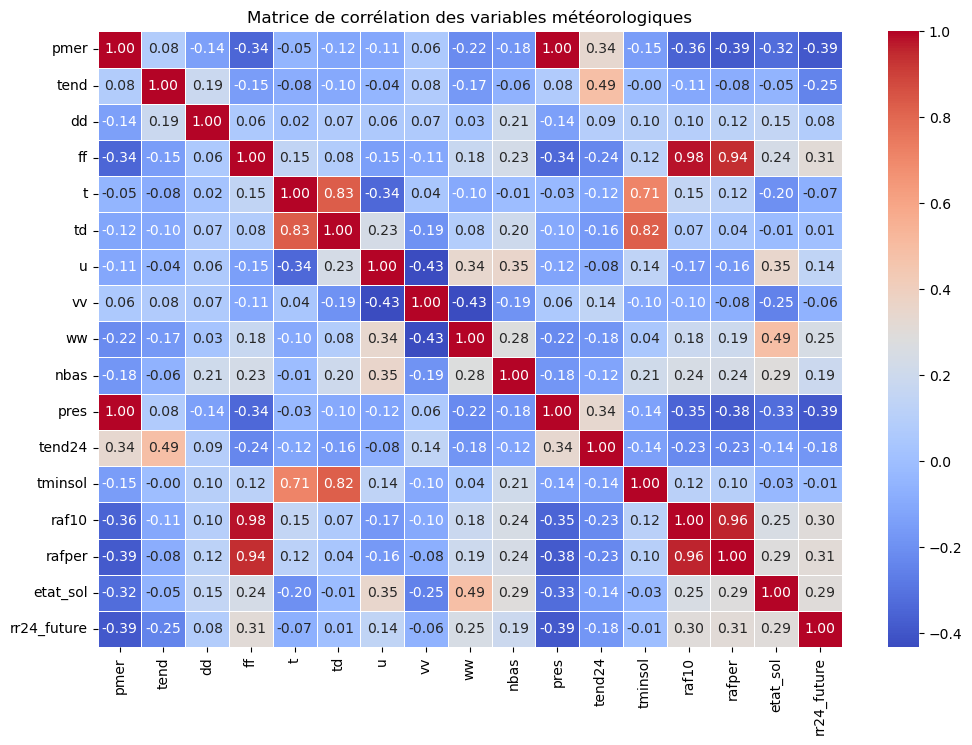

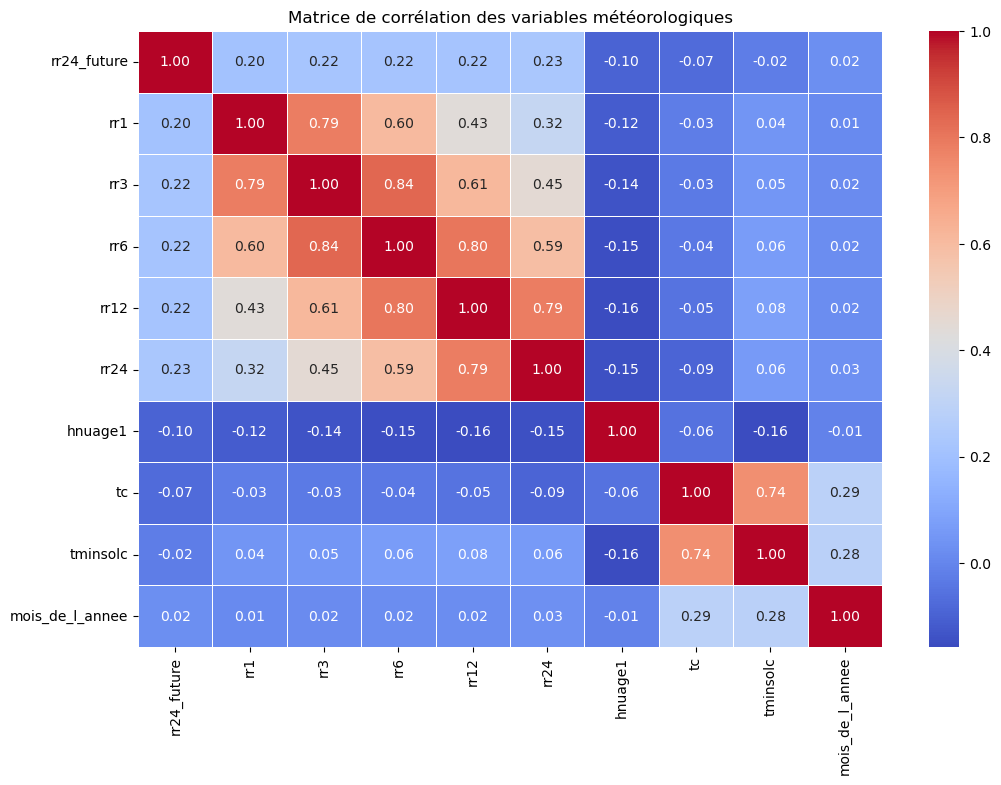

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


departement = 'Finistère'
df = pd.read_csv(f'data_{departement}.csv',low_memory=False)


# Sélection des colonnes numériques pertinentes pour la prédiction de la pluie
features1 = [ 'pmer', 'tend', 'dd', 'ff', 't', 'td', 'u', 'vv', 'ww', 'nbas', 'pres', 'tend24',  'tminsol',  'raf10','rafper','etat_sol', 'rr24_future']
features2 = [   'rr24_future','rr1', 'rr3', 'rr6', 'rr12', 'rr24', 'hnuage1', 'tc', 'tminsolc', 'mois_de_l_annee']

df["rr24_future"] = df["rr24"].shift(-8)
df_matrix1 = df[features1].dropna()  # Supprimer les valeurs manquantes
df_matrix2 = df[features2].dropna()
#df_clean = df_matrix.dropna(axis=1, how='all')  # Supprime les colonnes entièrement vides
correlation_matrix1 = df_matrix1.corr()
correlation_matrix2 = df_matrix2.corr()


# Affichage de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix1, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrélation des variables météorologiques")
plt.show()
# Affichage de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix2, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrélation des variables météorologiques")
plt.show()

In [30]:
import numpy as np

# Sélectionner uniquement les colonnes numériques
features_numeriques = [col for col in features if col in df.select_dtypes(include=[np.number]).columns]

print("🔢 Features numériques :", features_numeriques)


🔢 Features numériques : ['numer_sta', 'pmer', 'tend', 'cod_tend', 'dd', 'ff', 't', 'td', 'u', 'vv', 'ww', 'w1', 'w2', 'n', 'nbas', 'hbas', 'cl', 'cm', 'ch', 'pres', 'niv_bar', 'geop', 'tend24', 'tn12', 'tn24', 'tx12', 'tx24', 'tminsol', 'sw', 'tw', 'raf10', 'rafper', 'per', 'etat_sol', 'ht_neige', 'ssfrai', 'perssfrai', 'rr1', 'rr3', 'rr6', 'rr12', 'rr24', 'phenspe1', 'phenspe2', 'phenspe3', 'phenspe4', 'nnuage1', 'ctype1', 'hnuage1', 'nnuage2', 'ctype2', 'hnuage2', 'nnuage3', 'ctype3', 'hnuage3', 'nnuage4', 'ctype4', 'hnuage4', 'tc', 'tn12c', 'tn24c', 'tx12c', 'tx24c', 'tminsolc', 'latitude', 'longitude', 'altitude', 'codegeo', 'code_epci', 'code_dep', 'code_reg', 'mois_de_l_annee', 'rr24_future']


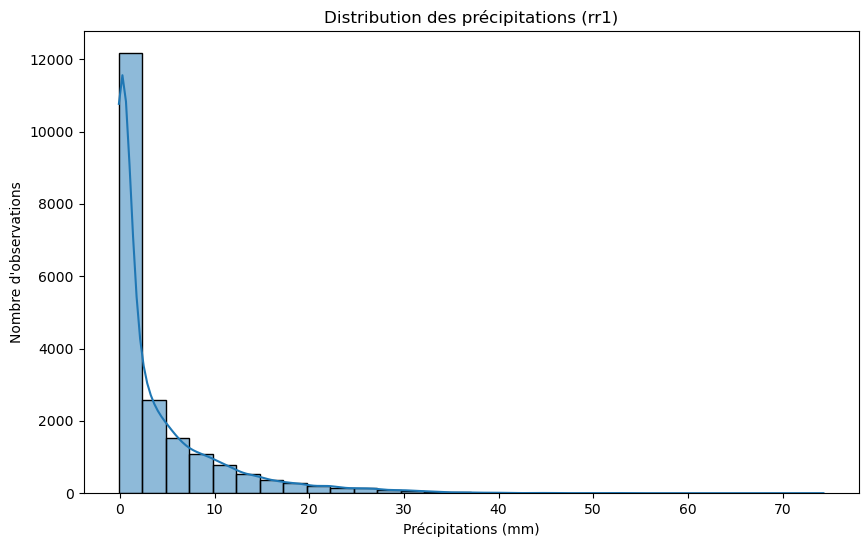

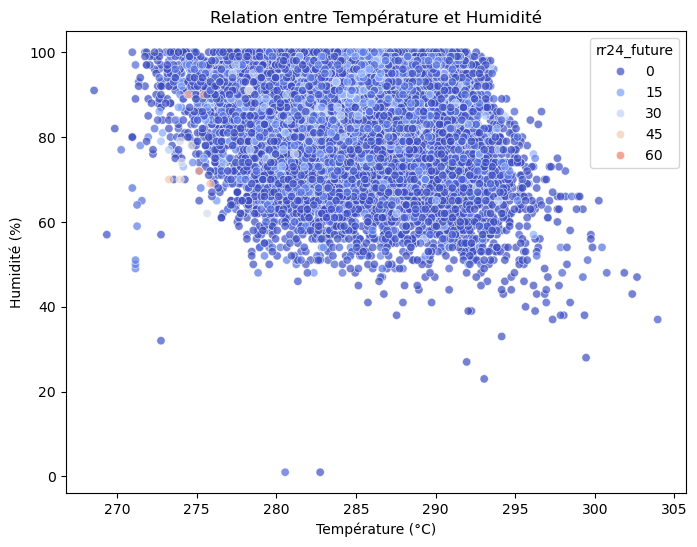

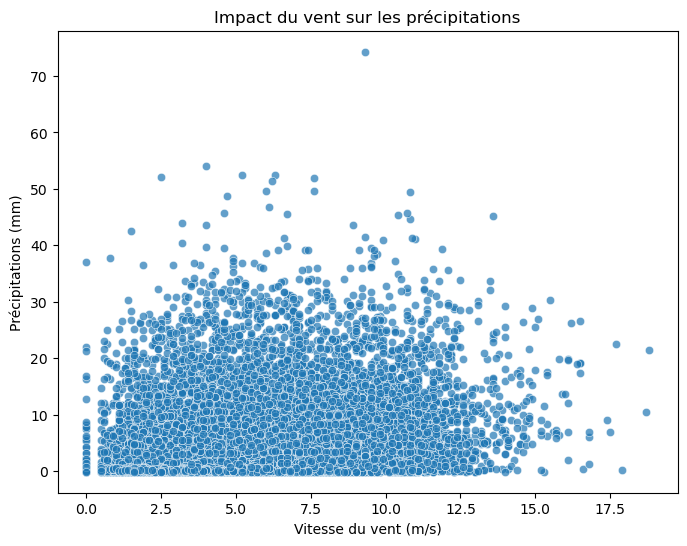

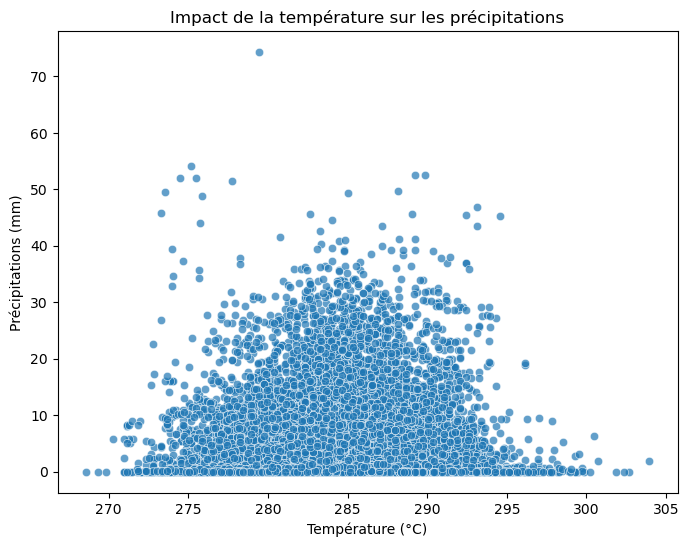

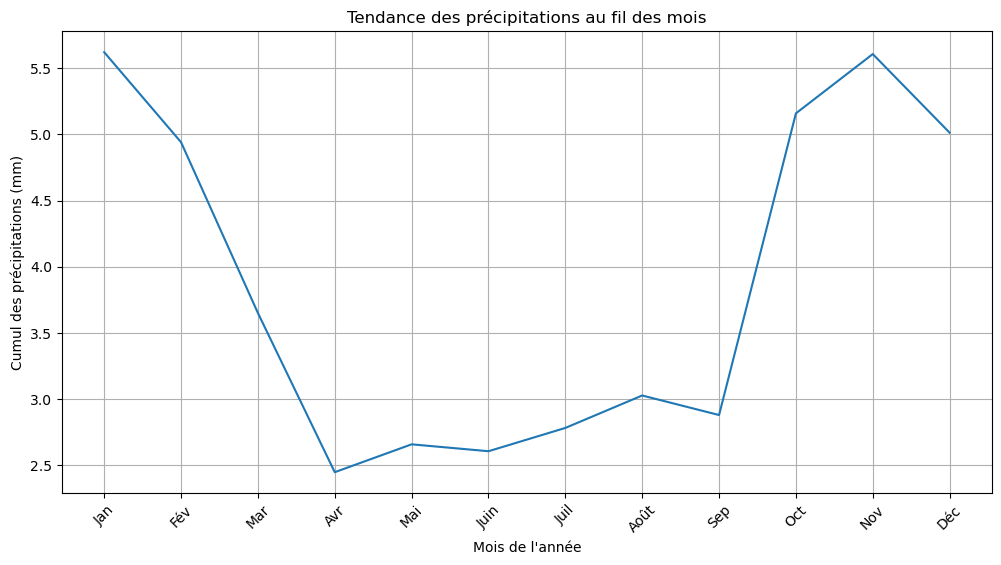

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

departement = 'Finistère'
df = pd.read_csv(f'data_{departement}.csv',low_memory=False)
df["rr24_future"] = df["rr24"].shift(-8)

# Sélection des variables pertinentes
df = df[["mois_de_l_annee","date", "t", "td", "u", "pmer", "pres", "ff", "raf10", "n", "vv", "rr24_future"]].dropna()


# --- 1. Distribution des précipitations (rr1) ---
plt.figure(figsize=(10, 6))
sns.histplot(df["rr24_future"], bins=30, kde=True)
plt.xlabel("Précipitations (mm)")
plt.ylabel("Nombre d'observations")
plt.title("Distribution des précipitations (rr1)")
plt.show()

# --- 2. Corrélation entre température et humidité ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["t"], y=df["u"], hue=df["rr24_future"], palette="coolwarm", alpha=0.7)
plt.xlabel("Température (°C)")
plt.ylabel("Humidité (%)")
plt.title("Relation entre Température et Humidité")
plt.show()

# --- 3. Vent et précipitations ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["ff"], y=df["rr24_future"], alpha=0.7)
plt.xlabel("Vitesse du vent (m/s)")
plt.ylabel("Précipitations (mm)")
plt.title("Impact du vent sur les précipitations")
plt.show()

# --- 4. Température et précipitations ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["t"], y=df["rr24_future"], alpha=0.7)
plt.xlabel("Température (°C)")
plt.ylabel("Précipitations (mm)")
plt.title("Impact de la température sur les précipitations")
plt.show()

plt.figure(figsize=(12, 6))

df.groupby("mois_de_l_annee")["rr24_future"].mean().sort_index().plot()

plt.xlabel("Mois de l'année")
plt.ylabel("Cumul des précipitations (mm)")
plt.title("Tendance des précipitations au fil des mois")
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Fév", "Mar", "Avr", "Mai", "Juin",
    "Juil", "Août", "Sep", "Oct", "Nov", "Déc"
], rotation=45)

plt.grid(True)
plt.show()